In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.utils.np_utils import to_categorical
from keras.layers import BatchNormalization, Dropout
import cv2


Using TensorFlow backend.


In [55]:
X_train = np.zeros((15*3, 24,24))
y_train = np.zeros(15*3)

for i in range(15) :    
    img = cv2.imread('hard_handwriting_shape/train/circle/circle{0:03d}.png'.format(i+1), 0)        
    X_train[i,:,:] = img
    y_train[i] = 0
    
for i in range(15) :    
    img = cv2.imread('hard_handwriting_shape/train/rectangle/rectangle{0:03d}.png'.format(i+1), 0)        
    X_train[15+i,:,:] = img
    y_train[15+i] = 1
    
for i in range(15) :    
    img = cv2.imread('hard_handwriting_shape/train/triangle/triangle{0:03d}.png'.format(i+1), 0)        
    X_train[30+i,:,:] = img
    y_train[30+i] = 2     
    



In [58]:
X_test = np.zeros((5*3, 24,24))
y_test = np.zeros(5*3)

for i in range(5) :    
    img = cv2.imread('hard_handwriting_shape/test/circle/circle{0:03d}.png'.format(i+21), 0)        
    X_test[i,:,:] = img
    y_test[i] = 0
    
for i in range(5) :    
    img = cv2.imread('hard_handwriting_shape/test/rectangle/rectangle{0:03d}.png'.format(i+21), 0)        
    X_test[5+i,:,:] = img
    y_test[5+i] = 1
    
for i in range(5) :    
    img = cv2.imread('hard_handwriting_shape/test/triangle/triangle{0:03d}.png'.format(i+21), 0)        
    X_test[10+i,:,:] = img
    y_test[10+i] = 2

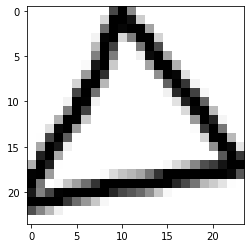

Label:  2.0


In [59]:
plt.imshow(X_test[14], cmap="gray")    # show first number in the dataset
plt.show()
print('Label: ', y_test[14])

In [60]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(45, 24, 24) (15, 24, 24) (45, 3) (15, 3)


In [61]:
# 4차원으로 변경
X_train =  X_train.reshape(-1, 24,24,1)
X_test =  X_test.reshape(-1, 24,24,1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(45, 24, 24, 1)
(15, 24, 24, 1)
(45, 3)
(15, 3)


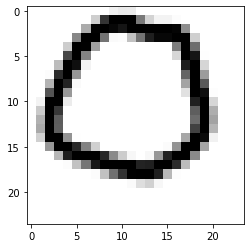

In [62]:
plt.imshow(X_train[2,:,:,0], cmap="gray")  
plt.show()

In [93]:
# 모델 구성하기
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(24,24,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
    
model.add(Conv2D(64, (3, 3))) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128)) 
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(64)) 
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Dense(3, activation='softmax'))

# 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [134]:
# 모델 학습시키기 #1
history = model.fit(X_train, y_train, batch_size = 100, epochs = 100, validation_data =(X_test, y_test), verbose = 0)

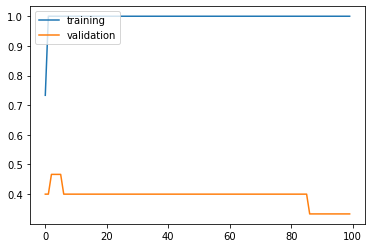

15/15 [==============================] - 0s 262us/step
[2.4486119747161865, 0.3333333432674408]


In [77]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()
results = model.evaluate(X_test, y_test)
print(results)

In [103]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 22, 22, 32)        320       
_________________________________________________________________
batch_normalization_44 (Batc (None, 22, 22, 32)        128       
_________________________________________________________________
activation_56 (Activation)   (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
batch_normalization_45 (Batc (None, 9, 9, 64)          256       
_________________________________________________________________
activation_57 (Activation)   (None, 9, 9, 64)        

In [87]:
for l in model.layers:
    print(l.name)
    print(l.trainable)

conv2d_31
True
batch_normalization_36
True
activation_48
True
max_pooling2d_19
True
conv2d_32
True
batch_normalization_37
True
activation_49
True
max_pooling2d_20
True
flatten_16
True
dense_33
True
batch_normalization_38
True
activation_50
True
dense_34
True
batch_normalization_39
True
activation_51
True
dense_35
True


In [90]:
w = model.layers[0].get_weights()
print(w[0].shape)
print(w[1].shape)

print(w[0][:,:,0,0])
print(w[1][0])


(3, 3, 1, 32)
(32,)
[[ 0.05411995 -0.10951243 -0.09120001]
 [ 0.10577349 -0.03272899 -0.03562424]
 [-0.13772908  0.02869546 -0.06775989]]
-0.00010084312


In [88]:
model.layers[0].output

<tf.Tensor 'conv2d_31/BiasAdd:0' shape=(None, 22, 22, 32) dtype=float32>

In [106]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 22, 22, 32)        320       
_________________________________________________________________
batch_normalization_44 (Batc (None, 22, 22, 32)        128       
_________________________________________________________________
activation_56 (Activation)   (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
batch_normalization_45 (Batc (None, 9, 9, 64)          256       
_________________________________________________________________
activation_57 (Activation)   (None, 9, 9, 64)        

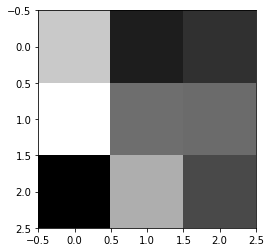

In [116]:
plt.imshow(w[0][:,:,0,0], cmap="gray")

(15, 22, 22, 32)


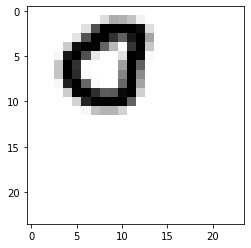

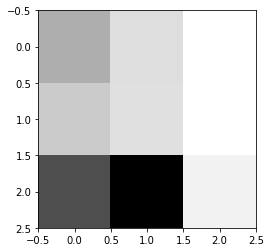

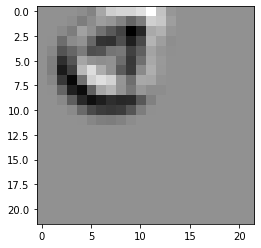

In [142]:
from keras.models import Model
my_layer_model = Model(inputs=model.input, 
                       outputs=model.layers[0].output)
output = my_layer_model.predict(X_test)
print(output.shape)

iFilter = 5
iImg = 1

# 1번 이미지
plt.imshow(X_test[iImg,:,:,0], cmap="gray")
plt.show()
# filter
w = model.layers[0].get_weights()
w = w[0]
f = w[:,:,0, iFilter]
plt.imshow(f, cmap="gray")
plt.show()

# 출력
plt.imshow(output[iImg,:,:, iFilter], cmap="gray")
plt.show()

In [125]:
my_layer_model = Model(inputs=model.input, 
                       outputs=model.get_layer("flatten_18").output)
output = my_layer_model.predict(X_test)

print(output.shape)

(15, 1024)


In [153]:
my_layer_model = Model(inputs=model.input, 
                       outputs=model.get_layer("dense_41").output)
output = my_layer_model.predict(X_test)

print(output.shape)
#print(output)
p =np.argmax(output, axis=1)
T = np.argmax(y_test, axis = 1)

print(p)
print(T)
print(  (p == T)*1 )
print(  sum(p == T)*1 )
print(  sum(p == T)*1  / len(p))


(15, 3)
[2 0 2 2 2 0 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
[0 1 0 0 0 0 0 0 0 0 1 1 1 1 1]
6
0.4


In [126]:
from keras import backen

In [ ]:
from keras import backend as K

layer_name = 'conv2d_35'
filter_index = 0  

layer_output = model.layers[0].output
loss = K.mean(layer_output[:, :, :, filter_index])



# compute the gradient of the input picture wrt this loss
grads = K.gradients(loss, input_img)[0]

# normalization trick: we normalize the gradient
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

# this function returns the loss and grads given the input picture
iterate = K.function([input_img], [loss, grads])

input_img_data = np.random.random((1, 3, img_width, img_height)) * 20 + 128.
# run gradient ascent for 20 steps
for i in range(20):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step
    
    

In [ ]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

img = input_img_data[0]
img = deprocess_image(img)
imsave('%s_filter_%d.png' % (layer_name, filter_index), img)